In [15]:
import pandas as pd
import sklearn

In [18]:
df = pd.read_csv('output.csv') #hier eigene Daten

print(df['Activity'].nunique())
#print(df['concept:name'].nunique())
print(df['CO_rule'].nunique())

print(df['AT_rule'].unique())
print('-'*60)
print(df['CT_rule'].unique())
print('-'*60)
print(df['TT_rule'].unique())
print('-'*60)
print(df['CO_rule'].unique())

df

154
12
["(`at:phase` ELEMENT OF {'01_HOOFD_7'})"
 "(`at:phase` ELEMENT OF {'01_HOOFD_8'})"
 "(`at:phase` ELEMENT OF {'01_HOOFD_0', '01_HOOFD_1', '01_HOOFD_4', '01_HOOFD_5'})"
 "(`at:phase` ELEMENT OF {'01_HOOFD_2'})"
 "(`at:phase` ELEMENT OF {'01_HOOFD_3'})"
 "(`at:phase` ELEMENT OF {'01_HOOFD_6'})"]
------------------------------------------------------------
['T(NULL)']
------------------------------------------------------------
["(`tt:weekday` ELEMENT OF {'Sat'})"
 "(`tt:weekday` ELEMENT OF {'Fri', 'Mon', 'Thu', 'Tue', 'Wed'})"
 "(`tt:weekday` ELEMENT OF {'Sun'})"]
------------------------------------------------------------
["(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOFD_7'}) AND (`tt:weekday` ELEMENT OF {'Sat'})"
 "(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOFD_8'}) AND (`tt:weekday` ELEMENT OF {'Sat'})"
 "(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOFD_0', '01_HOOFD_1', '01_HOOFD_4', '01_HOOFD_5'}) AND (`tt:weekday` ELEMENT OF {'Sat'})"
 "(T(NULL)) AND (`at:phase` ELEMENT OF 

,Unnamed: 0.1,Unnamed: 0,case:concept:name,activity,org:resource,time:timestamp,ct:last_phase,case_parts,Activity,r:municipality,...,tt:weekday,tt:ampm,CT,AT,TT,CO,AT_rule,CT_rule,TT_rule,CO_rule
0,13940,16593,3864334,close case,560600,2011-02-26 01:28:22,Procedure afgebroken,"Bouw,Handelen in strijd met regels RO",01_HOOFD_790,muni-5,...,Sat,AM,NaN,7,Sat,null/7/Sat,(`at:phase` ELEMENT OF {'01_HOOFD_7'}),T(NULL),(`tt:weekday` ELEMENT OF {'Sat'}),(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOF...
1,20327,24297,3966927,register deadline,560429,2011-04-09 08:00:00,Procedure afgebroken,Bouw,01_HOOFD_790,muni-5,...,Sat,AM,NaN,7,Sat,null/7/Sat,(`at:phase` ELEMENT OF {'01_HOOFD_7'}),T(NULL),(`tt:weekday` ELEMENT OF {'Sat'}),(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOF...
2,76764,99350,7691853,register deadline,560519,2012-06-09 08:00:00,Zaak afgehandeld,Bouw,01_HOOFD_810,muni-2,...,Sat,AM,NaN,8,Sat,null/8/Sat,(`at:phase` ELEMENT OF {'01_HOOFD_8'}),T(NULL),(`tt:weekday` ELEMENT OF {'Sat'}),(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOF...
3,85689,112021,19476632,register deadline,560519,2012-08-25 08:00:00,Zaak afgehandeld,Bouw,01_HOOFD_810,muni-2,...,Sat,AM,NaN,8,Sat,null/8/Sat,(`at:phase` ELEMENT OF {'01_HOOFD_8'}),T(NULL),(`tt:weekday` ELEMENT OF {'Sat'}),(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOF...
4,85692,112024,19836934,register deadline,560519,2012-08-25 08:00:00,Zaak afgehandeld,"Aanleg (Uitvoeren werk of werkzaamheid),Inrit/...",01_HOOFD_810,muni-2,...,Sat,AM,NaN,8,Sat,null/8/Sat,(`at:phase` ELEMENT OF {'01_HOOFD_8'}),T(NULL),(`tt:weekday` ELEMENT OF {'Sat'}),(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOF...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193448,189585,257536,8376583,register submission date request,560749,2015-02-08 09:00:00,Aanvraag ontvangen,Bouw,01_HOOFD_010,muni-3,...,Sun,AM,NaN,0-1-4-5,Sun,null/0-1-4-5/Sun,"(`at:phase` ELEMENT OF {'01_HOOFD_0', '01_HOOF...",T(NULL),(`tt:weekday` ELEMENT OF {'Sun'}),(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOF...
193449,189586,257537,13501080,register submission date request,560530,2015-02-08 09:00:00,Aanvullende gegevens gevraagd,Handelen in strijd met regels RO,01_HOOFD_010,muni-5,...,Sun,AM,NaN,0-1-4-5,Sun,null/0-1-4-5/Sun,"(`at:phase` ELEMENT OF {'01_HOOFD_0', '01_HOOF...",T(NULL),(`tt:weekday` ELEMENT OF {'Sun'}),(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOF...
193450,190781,259121,8408940,register submission date request,560749,2015-02-15 09:00:00,Aanvraag ontvangen,Inrit/Uitweg,01_HOOFD_010,muni-3,...,Sun,AM,NaN,0-1-4-5,Sun,null/0-1-4-5/Sun,"(`at:phase` ELEMENT OF {'01_HOOFD_0', '01_HOOF...",T(NULL),(`tt:weekday` ELEMENT OF {'Sun'}),(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOF...
193451,191680,260250,8451197,register submission date request,560749,2015-02-22 09:00:00,Advies bekend,Bouw,01_HOOFD_010,muni-3,...,Sun,AM,NaN,0-1-4-5,Sun,null/0-1-4-5/Sun,"(`at:phase` ELEMENT OF {'01_HOOFD_0', '01_HOOF...",T(NULL),(`tt:weekday` ELEMENT OF {'Sun'}),(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOF...


In [14]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from math import log

#X1 = df.groupby(['Resource', 'Activity']).size().unstack().fillna(0)
#X2 = df.groupby(['Resource', 'CO']).size().unstack().fillna(0)
X1 = df.groupby(['org:resource', 'concept:name']).size().unstack().fillna(0) #concept name = activity
X2 = df.groupby(['org:resource', 'CO_rule']).size().unstack().fillna(0)
#X = X.applymap(lambda x: log(x + 1))

best_k = -1
best_score = -2

# for k in range(2, len(X)):
#     clu = AgglomerativeClustering(n_clusters=k).fit_predict(X)
#     ss = silhouette_score(X, clu)
#     if ss > best_score:
#         best_score = ss
#         best_k = k
# print(best_k)

# clu = AgglomerativeClustering(n_clusters=best_k).fit_predict(X)
# print(best_k)
# print(silhouette_score(X, clu))

l_ss1 = []
l_ss2 = []
for k in range(2, len(X1)):
    clu1 = AgglomerativeClustering(n_clusters=k).fit_predict(X1)
    ss1 = silhouette_score(X1, clu1)
    l_ss1.append(ss1)
    clu2 = AgglomerativeClustering(n_clusters=k).fit_predict(X2)
    ss2 = silhouette_score(X2, clu2)
    l_ss2.append(ss2)

data = []
for i in range(len(l_ss1)):
    data.append({'k': i + 2, 'score': l_ss2[i], 'matrix based on': 'Execution Context'})
    data.append({'k': i + 2, 'score': l_ss1[i], 'matrix based on': 'Activity'})

data = pd.DataFrame(data)

data

KeyError: 'org:resource'

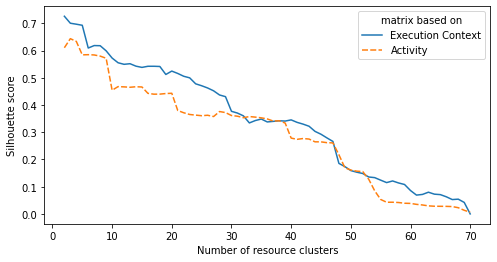

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.lineplot(data=data, x="k", y="score", ax=ax, hue="matrix based on", style='matrix based on')
plt.xlabel('Number of resource clusters')
plt.ylabel("Silhouette score")
plt.show()
f.savefig("plot2.pdf", bbox_inches='tight')